In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [43]:
df = pd.read_csv('data.csv')
df.head()

,fecha,indicativo,nombre,provincia,altitud,tmed,prec,tmin,horatmin,tmax,horatmax,dir,velmedia,racha,horaracha,hrMedia,hrMax,horaHrMax,hrMin,horaHrMin
0,2018-01-01,8409X,LLÍRIA,VALENCIA,198,"12,7","0,0","7,9",03:44,"17,5",13:36,25.0,"5,8","13,6",14:40,36.0,54.0,Varias,26.0,13:10
1,2018-01-02,8409X,LLÍRIA,VALENCIA,198,"14,7","0,0","9,8",02:54,"19,6",15:01,26.0,"6,1","14,4",00:10,51.0,69.0,03:00,40.0,14:10
2,2018-01-03,8409X,LLÍRIA,VALENCIA,198,"16,0","0,0","9,7",02:32,"22,2",14:34,28.0,"5,6","15,3",11:30,54.0,76.0,02:40,44.0,Varias
3,2018-01-04,8409X,LLÍRIA,VALENCIA,198,"18,2","0,0","14,5",23:57,"22,0",13:23,28.0,"6,9","16,1",16:10,53.0,66.0,05:20,43.0,12:40
4,2018-01-05,8409X,LLÍRIA,VALENCIA,198,"11,6","0,0","5,2",23:59,"18,0",13:38,30.0,"5,8","15,8",10:10,49.0,84.0,23:59,40.0,Varias


Cambiar de formato **tmed**, **prec**, **tmin**, **tmax**, **velmedia** y **racha** a float

In [44]:
print(df.shape)
print(df.info())

(1823, 20)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1823 entries, 0 to 1822
Data columns (total 20 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   fecha       1823 non-null   object 
 1   indicativo  1823 non-null   object 
 2   nombre      1823 non-null   object 
 3   provincia   1823 non-null   object 
 4   altitud     1823 non-null   int64  
 5   tmed        1792 non-null   object 
 6   prec        1820 non-null   object 
 7   tmin        1792 non-null   object 
 8   horatmin    1792 non-null   object 
 9   tmax        1792 non-null   object 
 10  horatmax    1792 non-null   object 
 11  dir         1802 non-null   float64
 12  velmedia    1814 non-null   object 
 13  racha       1802 non-null   object 
 14  horaracha   1802 non-null   object 
 15  hrMedia     1805 non-null   float64
 16  hrMax       1797 non-null   float64
 17  horaHrMax   1797 non-null   object 
 18  hrMin       1797 non-null   float64
 19  horaHrMin   1797

In [45]:
nombres = ['tmed', 'prec', 'tmin', 'tmax', 'velmedia', 'racha']

for i in nombres:
    df[i] = df[i].str.replace(",", ".")
    df[i] = df[i].astype(float)

In [46]:
df.describe()

,altitud,tmed,prec,tmin,tmax,dir,velmedia,racha,hrMedia,hrMax,hrMin
count,1823.0,1792.000000,1820.000000,1792.000000,1792.00000,1802.000000,1814.000000,1802.000000,1805.000000,1797.000000,1797.000000
mean,198.0,17.759654,1.263736,11.383817,24.13856,21.597114,2.651488,9.616149,60.088089,86.534780,41.547023
std,0.0,6.155156,5.440954,5.913311,6.90145,17.713017,1.224085,3.410434,13.786682,9.304161,13.005209
min,198.0,3.500000,0.000000,-3.200000,5.10000,1.000000,0.300000,2.500000,24.000000,44.000000,13.000000
25%,198.0,12.600000,0.000000,6.600000,18.50000,12.000000,1.700000,7.200000,49.000000,82.000000,32.000000
50%,198.0,17.000000,0.000000,10.900000,23.80000,14.000000,2.500000,9.200000,60.000000,89.000000,40.000000
75%,198.0,23.200000,0.000000,16.700000,29.92500,28.000000,3.300000,11.100000,70.000000,94.000000,49.000000
max,198.0,32.000000,94.200000,25.400000,41.20000,99.000000,9.400000,27.800000,96.000000,100.000000,91.000000


In [47]:
df['fecha'] = pd.to_datetime(df['fecha'], format='%Y-%m-%d')

In [48]:
df.isnull().sum()

fecha          0
indicativo     0
nombre         0
provincia      0
altitud        0
tmed          31
prec           3
tmin          31
horatmin      31
tmax          31
horatmax      31
dir           21
velmedia       9
racha         21
horaracha     21
hrMedia       18
hrMax         26
horaHrMax     26
hrMin         26
horaHrMin     26
dtype: int64

<Axes: xlabel='fecha', ylabel='tmed'>

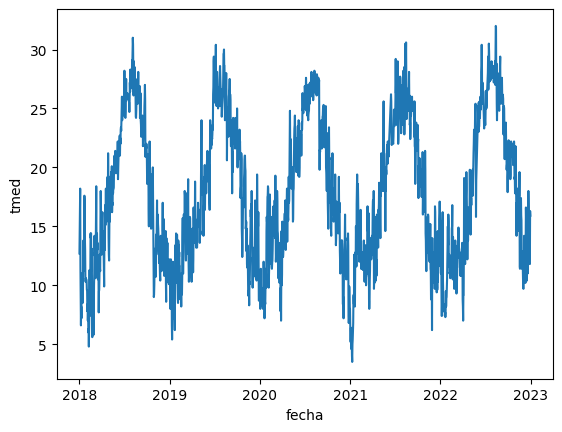

In [49]:
# grafico de "tmed" vs "fecha"

sns.lineplot(data=df, x="fecha", y="tmed")